In [1]:
import re
import string
import scipy
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from astropy.table import Table,Column
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import random

In [2]:
df=pd.read_csv(r'C:\Users\EEZ\Desktop\Semester 8\FYP\Evaluation\Python\TrainDataSet.csv')

df.columns.name="index"

df1=pd.DataFrame(df)

print(df1)

index  AF3betaL  AF3betaH  T7beta  T7betaH  PzbetaL  PzbetaH   T8beta  \
0        10.217     3.574   9.420    3.923    7.109    3.523   90.198   
1         2.438     3.425   6.754   11.590    1.483    3.999   18.262   
2        42.507    58.616  28.016    6.752   19.348    3.988  181.071   
3         2.541     2.508   4.368    5.027    1.004    0.831    2.184   
4        15.375    51.399   1.884    3.189    2.945    0.935    9.049   
5         6.141     2.949   2.772    9.016    1.853    3.250    3.717   
6        23.916    30.990   4.462    3.521    3.588    2.064    3.133   
7         2.661     1.525   1.448    2.253    1.367    0.962    3.659   
8         4.741     1.375   2.614    2.926    1.834    1.000    3.373   
9        13.987    30.749   3.678    3.362    4.832    1.897   18.422   
10       27.311     8.243  10.114   10.953    6.774    6.013   12.357   
11        0.420     1.034   0.942    0.811    1.520    0.816    3.458   
12        0.529     1.215   0.855    0.793    1.293

In [3]:
print("\nTrain Dataset Columns: \n")
print(df1.columns)

print("\nNumber of instances in Train Dataset\n")



print ("Train Instances",len(df1.index))


Train Dataset Columns: 

Index(['AF3betaL', 'AF3betaH', 'T7beta', 'T7betaH', 'PzbetaL', 'PzbetaH',
       'T8beta', 'T8betaH', 'AF4betaL', 'AF4betaH', 'Sum', 'Average',
       'Classification'],
      dtype='object', name='index')

Number of instances in Train Dataset

Train Instances 30


In [4]:
dt=pd.read_csv(r'C:\Users\EEZ\Desktop\Semester 8\FYP\Evaluation\Python\TestDataSet.csv')

dt.columns.name="index"

df2=pd.DataFrame(dt)

print(df2)

index  AF3betaL  AF3betaH  T7beta  T7betaH  PzbetaL  PzbetaH  T8beta  T8betaH  \
0        52.313    55.717   8.854    7.872   15.885   11.554  26.302   16.717   
1         6.000     6.297  12.753    3.438   10.065    5.499  14.605   12.190   
2        18.350    56.410   0.934    1.692    0.938    1.476   2.013    1.963   
3        15.375    51.399   1.884    3.189    2.945    0.935   9.049    4.154   
4         6.141     2.949   2.772    9.016    1.853    3.250   3.717    8.605   
5         0.606     0.661   1.135    0.795    2.073    0.669   2.674    1.251   
6         0.477     0.557   1.130    0.774    1.994    0.745   3.086    1.047   
7         0.377     0.554   1.121    0.777    1.900    0.811   3.453    0.865   
8         0.329     0.653   1.087    0.793    1.802    0.849   3.659    0.743   
9         0.346     0.829   1.022    0.809    1.686    0.849   3.651    0.692   

index  AF4betaL  AF4betaH      Sum  Average  Classification  
0        39.485    40.899  275.598  27.5598   

In [5]:
print("\nTest Dataset Columns: \n")
print(df2.columns)

print("\nNumber of instances in Train Dataset\n")



print ("Test Instances",len(df2.index))



Test Dataset Columns: 

Index(['AF3betaL', 'AF3betaH', 'T7beta', 'T7betaH', 'PzbetaL', 'PzbetaH',
       'T8beta', 'T8betaH', 'AF4betaL', 'AF4betaH', 'Sum', 'Average',
       'Classification'],
      dtype='object', name='index')

Number of instances in Train Dataset

Test Instances 10


Total number of Neutral and Motor Movement in Train Data


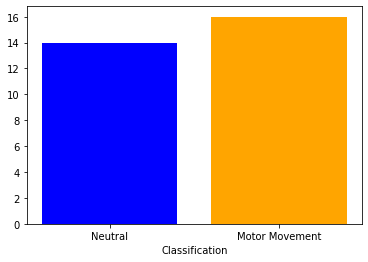

In [6]:
print("Total number of Neutral and Motor Movement in Train Data")

sizeff=len(df1[df1['Classification']==0])
sizemm=len(df1[df1['Classification']==1])

height=[sizemm,sizeff]

bars=('Neutral','Motor Movement')
y_pos=np.arange(len(bars))

plt.bar(y_pos, height,color=('blue','orange'))

plt.xticks(y_pos,bars)
plt.xlabel('Classification')

plt.show()

Total number of Neutral and Motor Movement in Test Data


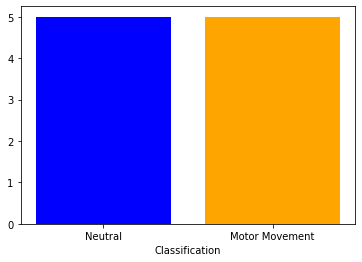

In [7]:
print("Total number of Neutral and Motor Movement in Test Data")

sizeff=len(df2[df2['Classification']==0])
sizemm=len(df2[df2['Classification']==1])

height=[sizemm,sizeff]

bars=('Neutral','Motor Movement')
y_pos=np.arange(len(bars))

plt.bar(y_pos, height,color=('blue','orange'))

plt.xticks(y_pos,bars)
plt.xlabel('Classification')

plt.show()

In [8]:
print("Train set Before Pre Processing")
print(df1)

Train set Before Pre Processing
index  AF3betaL  AF3betaH  T7beta  T7betaH  PzbetaL  PzbetaH   T8beta  \
0        10.217     3.574   9.420    3.923    7.109    3.523   90.198   
1         2.438     3.425   6.754   11.590    1.483    3.999   18.262   
2        42.507    58.616  28.016    6.752   19.348    3.988  181.071   
3         2.541     2.508   4.368    5.027    1.004    0.831    2.184   
4        15.375    51.399   1.884    3.189    2.945    0.935    9.049   
5         6.141     2.949   2.772    9.016    1.853    3.250    3.717   
6        23.916    30.990   4.462    3.521    3.588    2.064    3.133   
7         2.661     1.525   1.448    2.253    1.367    0.962    3.659   
8         4.741     1.375   2.614    2.926    1.834    1.000    3.373   
9        13.987    30.749   3.678    3.362    4.832    1.897   18.422   
10       27.311     8.243  10.114   10.953    6.774    6.013   12.357   
11        0.420     1.034   0.942    0.811    1.520    0.816    3.458   
12        0.529    

In [9]:
df1.AF3betaL=np.round(df1.AF3betaL,decimals=3)
df1.AF3betaH=np.round(df1.AF3betaH,decimals=3)
df1.T7beta=np.round(df1.T7beta,decimals=3)
df1.T7betaH=np.round(df1.T7betaH,decimals=3)
df1.PzbetaL=np.round(df1.PzbetaL,decimals=3)
df1.PzbetaH=np.round(df1.PzbetaH,decimals=3)
df1.T8beta=np.round(df1.T8beta,decimals=3)
df1.T8betaH=np.round(df1.T8betaH,decimals=3)
df1.AF4betaL=np.round(df1.AF4betaL,decimals=3)
df1.AF4betaH=np.round(df1.AF4betaH,decimals=3)

print("\nTrain set After Pre Processing")
print(df1)


Train set After Pre Processing
index  AF3betaL  AF3betaH  T7beta  T7betaH  PzbetaL  PzbetaH   T8beta  \
0        10.217     3.574   9.420    3.923    7.109    3.523   90.198   
1         2.438     3.425   6.754   11.590    1.483    3.999   18.262   
2        42.507    58.616  28.016    6.752   19.348    3.988  181.071   
3         2.541     2.508   4.368    5.027    1.004    0.831    2.184   
4        15.375    51.399   1.884    3.189    2.945    0.935    9.049   
5         6.141     2.949   2.772    9.016    1.853    3.250    3.717   
6        23.916    30.990   4.462    3.521    3.588    2.064    3.133   
7         2.661     1.525   1.448    2.253    1.367    0.962    3.659   
8         4.741     1.375   2.614    2.926    1.834    1.000    3.373   
9        13.987    30.749   3.678    3.362    4.832    1.897   18.422   
10       27.311     8.243  10.114   10.953    6.774    6.013   12.357   
11        0.420     1.034   0.942    0.811    1.520    0.816    3.458   
12        0.529    

In [10]:
print("Test set Before Pre Processing")
print(df2)

Test set Before Pre Processing
index  AF3betaL  AF3betaH  T7beta  T7betaH  PzbetaL  PzbetaH  T8beta  T8betaH  \
0        52.313    55.717   8.854    7.872   15.885   11.554  26.302   16.717   
1         6.000     6.297  12.753    3.438   10.065    5.499  14.605   12.190   
2        18.350    56.410   0.934    1.692    0.938    1.476   2.013    1.963   
3        15.375    51.399   1.884    3.189    2.945    0.935   9.049    4.154   
4         6.141     2.949   2.772    9.016    1.853    3.250   3.717    8.605   
5         0.606     0.661   1.135    0.795    2.073    0.669   2.674    1.251   
6         0.477     0.557   1.130    0.774    1.994    0.745   3.086    1.047   
7         0.377     0.554   1.121    0.777    1.900    0.811   3.453    0.865   
8         0.329     0.653   1.087    0.793    1.802    0.849   3.659    0.743   
9         0.346     0.829   1.022    0.809    1.686    0.849   3.651    0.692   

index  AF4betaL  AF4betaH      Sum  Average  Classification  
0        39.485

In [11]:
df2.AF3betaL=np.round(df1.AF3betaL,decimals=3)
df2.AF3betaH=np.round(df1.AF3betaH,decimals=3)
df2.T7beta=np.round(df1.T7beta,decimals=3)
df2.T7betaH=np.round(df1.T7betaH,decimals=3)
df2.PzbetaL=np.round(df1.PzbetaL,decimals=3)
df2.PzbetaH=np.round(df1.PzbetaH,decimals=3)
df2.T8beta=np.round(df1.T8beta,decimals=3)
df2.T8betaH=np.round(df1.T8betaH,decimals=3)
df2.AF4betaL=np.round(df1.AF4betaL,decimals=3)
df2.AF4betaH=np.round(df1.AF4betaH,decimals=3)

print("\nTest set After Pre Processing")
print(df2)


Test set After Pre Processing
index  AF3betaL  AF3betaH  T7beta  T7betaH  PzbetaL  PzbetaH   T8beta  \
0        10.217     3.574   9.420    3.923    7.109    3.523   90.198   
1         2.438     3.425   6.754   11.590    1.483    3.999   18.262   
2        42.507    58.616  28.016    6.752   19.348    3.988  181.071   
3         2.541     2.508   4.368    5.027    1.004    0.831    2.184   
4        15.375    51.399   1.884    3.189    2.945    0.935    9.049   
5         6.141     2.949   2.772    9.016    1.853    3.250    3.717   
6        23.916    30.990   4.462    3.521    3.588    2.064    3.133   
7         2.661     1.525   1.448    2.253    1.367    0.962    3.659   
8         4.741     1.375   2.614    2.926    1.834    1.000    3.373   
9        13.987    30.749   3.678    3.362    4.832    1.897   18.422   

index  T8betaH  AF4betaL  AF4betaH      Sum  Average  Classification  
0       39.518    11.945     3.040  275.598  27.5598               1  
1        8.206     2.64

In [12]:
from sklearn import datasets,linear_model,metrics
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

logisticRegr = linear_model.LogisticRegression()

print('Parameters and their values:')

logisticRegr.fit(df1[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average'
]], df1['Classification'])


Parameters and their values:


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
Forest = RandomForestClassifier()

print('Parameters and their values:')

Forest.fit(df1[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average'
]], df1['Classification'])



Parameters and their values:


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
Linear = LinearSVC()

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore',category=ConvergenceWarning)

print('Parameters and their values:')

Linear.fit(df1[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average'
]], df1['Classification'])


Parameters and their values:


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [15]:
B = BernoulliNB()

print('Parameters and their values:')

B.fit(df1[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average'
]], df1['Classification'])


Parameters and their values:


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(df1[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average'
]], df1['Classification'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
kpred = classifier.predict(df2[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average']])

In [18]:
lgpredict= logisticRegr.predict(df2[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average']])
Fpredict = Forest.predict(df2[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average']])
Lpredict = Linear.predict(df2[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average']])
Bpredict = B.predict(df2[['AF3betaL','AF3betaH','T7beta','T7betaH','PzbetaL','PzbetaH','T8beta','T8betaH','AF4betaL','AF4betaH','Sum','Average']])

In [20]:
a1=accuracy_score(df2['Classification'],lgpredict)
a2=accuracy_score(df2['Classification'],Fpredict)
a3=accuracy_score(df2['Classification'],Lpredict)
a4=accuracy_score(df2['Classification'],Bpredict)
a5=accuracy_score(df2['Classification'],kpred)


print(a1)
print(a2)
print(a3)
print(a4)
print(a5)

0.6
0.5
0.6
0.5
0.9
